In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df=pd.read_csv("tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [190]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [191]:
tv_min=df.TV.min()
tv_max=df.TV.max()
Sales_min=df.Sales.min()
Sales_max=df.Sales.max()
df1=df
df1['TV']=df['TV'].apply(lambda x:(x-tv_min)/(tv_max-tv_min))
df1['Sales']=df['Sales'].apply(lambda x:(x-Sales_min)/(Sales_max-Sales_min))
df1.head()

,TV,Sales
0,0.775786,0.807087
1,0.148123,0.346457
2,0.055800,0.303150
3,0.509976,0.665354
4,0.609063,0.444882


In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


[]

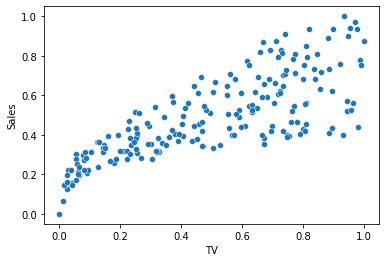

In [193]:
sns.scatterplot(data=df1,x="TV",y="Sales")
plt.plot()

## Prepareing Data for ml model

In [194]:
X=df1['TV']
y=df1['Sales']

In [195]:
X.sample(5)

0      0.775786
81     0.808590
100    0.749746
171    0.553940
45     0.589787
Name: TV, dtype: float64

In [196]:
y.head()

0    0.807087
1    0.346457
2    0.303150
3    0.665354
4    0.444882
Name: Sales, dtype: float64

In [197]:
X.shape

(200,)

In [198]:
X=X[:,np.newaxis]
X.shape

(200, 1)

In [199]:
y=y[:,np.newaxis]
y.shape

(200, 1)

In [200]:
w0=0.1
W=np.array([[0.5]])
W.shape

(1, 1)

In [201]:
n=len(df)
n

200

In [228]:
def gradient_descent(X,y,W,w0,alpha,epochs):
    
    for i in range(epochs):
        y_pred=X.dot(W)+w0
#         print(y_pred)
#         MSE=np.sum((y-y_pred)**2)/n
#         print('Mean Squared Error =',MSE)

        dw0=np.sum(y_pred-y)/n
        dW=np.sum(X*(y_pred-y))/n

        w0=w0-alpha*dw0
        W=W-alpha*dW
#         print(w0,W)
    return (w0,W)
    
    

In [232]:
w0_new,W_new=gradient_descent(X,y,W,w0,0.01,200)
y_pred=X.dot(W_new)+w0_new
MSE=np.sum((y-y_pred)**2)/n
print('Mean Squared Error =',MSE)
print(W_new,w0_new)

Mean Squared Error = 0.01642300004264681
[[0.55396234]] 0.20358950329230346


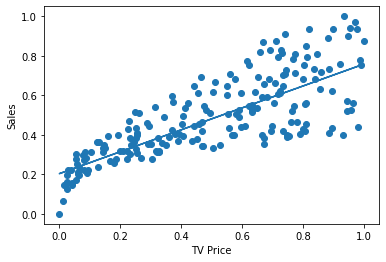

In [233]:
plt.scatter(X,y)
plt.xlabel('TV Price')
plt.ylabel('Sales')
plt.plot(X,y_pred) #ploting a line
plt.show()